<a href="https://www.kaggle.com/code/shamkumar1307/structural-health-monitoring-using-iot-and-ml?scriptVersionId=252348635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/iot-ebpl-connected-healthcare-monitoring'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iot-ebpl-connected-healthcare-monitoring/IOT-EBPL-Connected Healthcare Monitoring.csv


># Import Libraries & Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/iot-ebpl-connected-healthcare-monitoring/IOT-EBPL-Connected Healthcare Monitoring.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


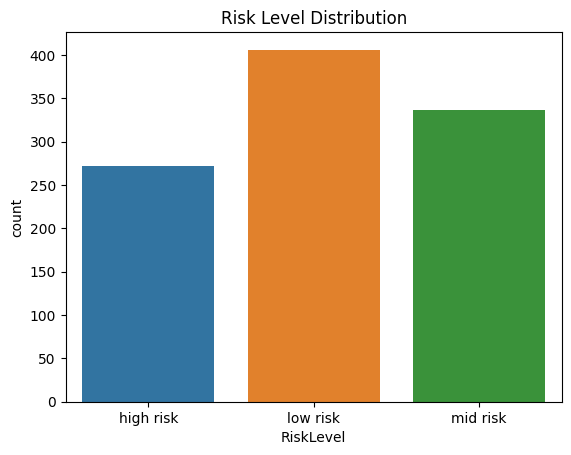

In [7]:
sns.countplot(data=df, x='RiskLevel')
plt.title("Risk Level Distribution")
plt.show()

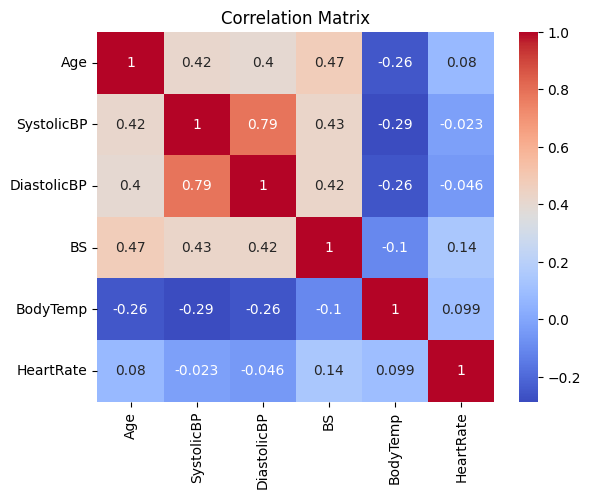

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BodyTemp', ylabel='HeartRate'>

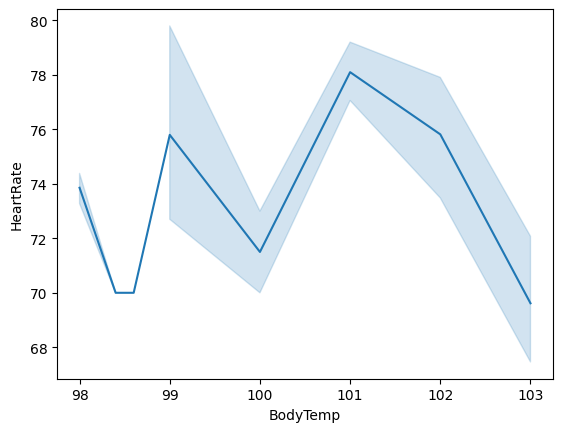

In [9]:
sns.lineplot(data=df, x='BodyTemp', y='HeartRate')

<Axes: >

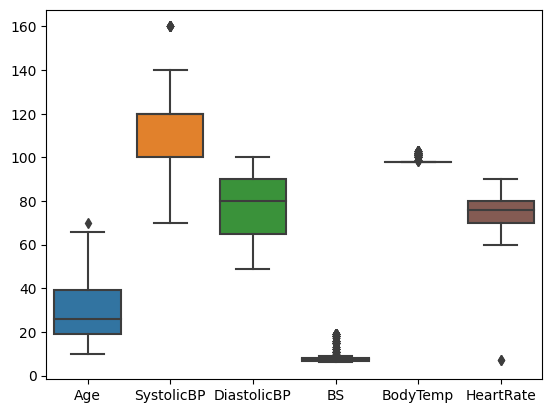

In [10]:
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))

In [11]:
numeric_col = df.select_dtypes(include=['float64','int64'])

for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]

<Axes: >

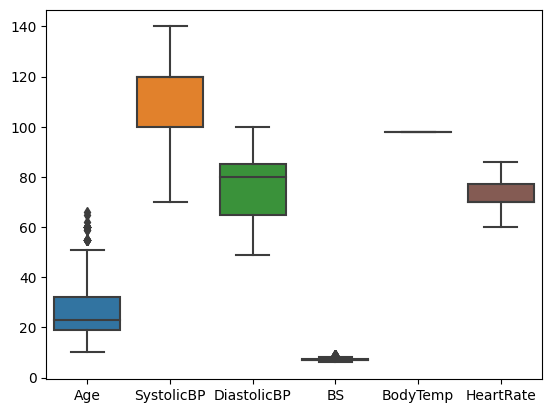

In [12]:
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))

# Data Preprocessing

In [13]:
'''from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
encoded = encoder.fit_transform(df[['RiskLevel']])'''

"from sklearn.preprocessing import OneHotEncoder\n\nencoder = OneHotEncoder(drop='first', sparse=False)\nencoded = encoder.fit_transform(df[['RiskLevel']])"

In [14]:
'''df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
df = pd.concat([df.drop('RiskLevel', axis=1), df_encoded], axis=1)
'''

"df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())\ndf = pd.concat([df.drop('RiskLevel', axis=1), df_encoded], axis=1)\n"

In [15]:
num_df = df.select_dtypes(include=['number']).columns.tolist()



In [16]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


In [17]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
3,30,140,85,7.00,98.0,70
4,35,120,60,6.10,98.0,76
5,23,140,80,7.01,98.0,70
6,23,130,70,7.01,98.0,78
8,32,120,90,6.90,98.0,70
...,...,...,...,...,...,...
964,35,140,100,8.00,98.0,66
981,25,140,100,7.20,98.0,80
985,32,140,100,8.00,98.0,70
997,35,140,100,9.00,98.0,66


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_features = num_df

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),       # Fill missing
    ('scaler', StandardScaler())                       # Scale features
])


In [19]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features)
])


In [20]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the pipeline (includes preprocessing + training)
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SystolicBP',
                                                   'DiastolicBP', 'BS',
                                                   'BodyTemp',
                                                   'HeartRate'])])),
                ('classifier', RandomForestClassifier())])

In [22]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

   high risk       1.00      0.88      0.93         8
    low risk       0.83      0.89      0.86        28
    mid risk       0.87      0.83      0.85        24

    accuracy                           0.87        60
   macro avg       0.90      0.87      0.88        60
weighted avg       0.87      0.87      0.87        60



In [23]:
print("\nTrain Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest Set Class Distribution:")
print(y_test.value_counts(normalize=True))



Train Set Class Distribution:
RiskLevel
low risk     0.570370
mid risk     0.351852
high risk    0.077778
Name: proportion, dtype: float64

Test Set Class Distribution:
RiskLevel
low risk     0.466667
mid risk     0.400000
high risk    0.133333
Name: proportion, dtype: float64


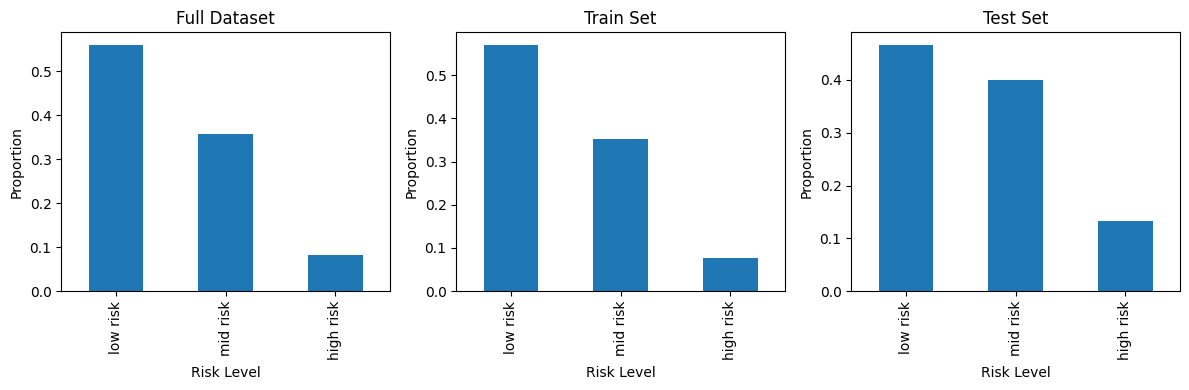

In [24]:
import matplotlib.pyplot as plt

# Plot side-by-side bars
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Full
y.value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Full Dataset')
# Train
y_train.value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Train Set')
# Test
y_test.value_counts(normalize=True).plot(kind='bar', ax=ax[2], title='Test Set')

for a in ax:
    a.set_xlabel('Risk Level')
    a.set_ylabel('Proportion')

plt.tight_layout()
plt.show()


Random Forest Classifier

In [25]:
data = [35,	120,	60,	6.1,	98.0,	76]

data_1 =pd.DataFrame(data)


data_1

,0
0,35.0
1,120.0
2,60.0
3,6.1
4,98.0
5,76.0
